# Data Wrangling Part 1 - Python and Jupyter Notebooks

The following report was submitted as part of my Master of Data Science coursework on Data Wrangling. This report will be the first in a five part series where I showcase work on various topics relating to Data Wrangling. The scope of the first report in this series is to provide an introduction to basic python coding, data analysis and data visualization using Juypter Notebooks. Weight related measures were used to showcase python lists, list comprehensions, f-strings, and for loops. Beginners may find the information in this report useful as it lays the foundation for understanding essential concepts in data manipulation and analysis. Subsequent reports in this series will delve deeper into advanced techniques and tools for effective data wrangling.

## Introduction to Python and Jupyter Notebooks

&emsp; **Author:** Daniel Gladman <br>
&emsp; **Originally Written:** 2023-03-01 <br>

This report will investigate the concept of Body Mass Index (BMI). It will demonstrate how to compute, visualize and interpret BMI using Python and Jupyter Lab notebooks. It will also briefly discuss benefits and limitations of BMI from both a medical and societal perspective.

First the libraries used in this task shall be imported.

In [1]:
# Import the libraries
import matplotlib.pyplot as plt

### Computing BMI 
Next, some data will be created from which computing BMI will be possible. Going by the requirements of this task, python lists will be used. The following code segment will create three distinct variables to store three individual lists of names, heights (in centimeters) and weights (in kilograms) respectively. 

In [2]:
names = ['Bob', 'Fred', 'Sally', 'Mike', 'Joe']
heights = [187, 168, 165, 178, 190] # in cms
weights = [78, 75, 65, 90, 112] # in kgs

It is assumed that the name of every <i>i</i>-th person in the names list will correspond with the <i>i</i>-th height and weight in the height and weight lists respectively.

Next, using the lists created above, a new varible called bmis will be generated and a new list containing the BMI of each <i>i</i>-th named person.

The formula for calculating BMI is:

$$
BMI = \frac {mass_{kg}}{height^{2}_{m}} 
$$

Because the data created earlier used height in centimetres, height will need to be divided by 100 before the formula is applied.

In [3]:
bmis = [weight/((height/100)**2) for weight, height in zip(weights,heights)]
bmis

[22.305470559638533,
 26.573129251700685,
 23.875114784205696,
 28.40550435551067,
 31.02493074792244]

The above code chunk uses list comprehension to compute the BMI and output a list while preserving the order of each <i>i</i>-th person, all in a single line of code.

### Visualizing BMI
    
Next, a bar chart displaying each person's BMI will be generated.

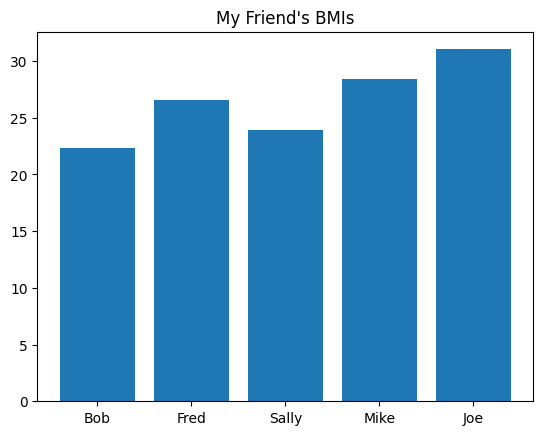

In [4]:
plt.bar(names, bmis)
plt.title("My Friend's BMIs")
plt.show()

The above chart provides a quick visual representation of how each person's BMI compares with the others. From the graph we can see that Joe has the highest BMI, while Bob has the lowest BMI. It's worth noting that this ease of comparison comes at the expense of sacrificing precision from the raw number data. It is known that Joe's BMI is the highest, but its precise value cannot be extracted from this visual suffice to say that it is slightly above 30. 

Next, each person's BMI will be interpreted using the World Health Organization's (WHO) definitions, where any BMI that is:
* less than 18.5 is classifed as underweight
* greater than and equal to 25 while less than 30 is overweight
* greater than and equal to 30 is classified as obese
* between 18.5 and 25 is classified as normal.

In [5]:
bmi_category = None
for name, bmi in zip(names, bmis):
    if bmi >= 30:
        bmi_category = "obese"
    elif bmi >= 25:
        bmi_category = "overweight"
    elif bmi >= 18.5:
        bmi_category = "normal"
    else:
        bmi_category = "underweight"

    print(f"{name} has BMI of {round(bmi,2)} which is {bmi_category}")    

Bob has BMI of 22.31 which is normal
Fred has BMI of 26.57 which is overweight
Sally has BMI of 23.88 which is normal
Mike has BMI of 28.41 which is overweight
Joe has BMI of 31.02 which is obese


Based on the results of the code, Bob and Sally both are considered as having normal weight for a person of their height, Fred and Mike are both considered overweight for their respective heights, and Joe is considered obese. 

### Benefits and Limitations of BMI
Overall, BMI is a cheap and simple way to assess a person's weight, the measure is not without limitations at both a medical and societal level.

##### **Medical Perspective**
BMI can be useful for determining who may be at risk of health problems that are known to be associated with weight, such as diabetes, high blood pressure, and heart disease. By filtering out in height, BMI can help a clinician adopt a more focused approach to tracking a patient's weight. However, there are limitations to using BMI as the sole measure of an individual's health status. For instance, BMI does not account for differences in body composition, such as muscle mass, or the location of fat (e.g. fat around organs). Not factoring in these details can lead to misclassifications, or ineffective treatment. Additionally, BMI does not account for differences in age, sex, or ethnicity, which can also factor into the onset of health issues.



##### **Societal Perspective**
BMI is a simple and cost-effective way of evaluating groups and populations on a global scale. It is able to provide quick preliminary information that can leveraged by policy makers to develop public health interventions and policies that correct rising instances of obesity. However, an overreliance on this measure could result in unnecessary medical interventions that crowd the healthcare system and place more burdens on tax payers.



### BMI Prime: An Alternative measure of BMI

Next, an alternative method for computing BMI will be considered. 

BMI Prime is a ratio of actual BMI to upper limit optimal BMI which is currently defined as 25 kg/m2; the limit upon which a person begins to be classified as obese.

The formula is simple;

$$
    bmiPrime = \frac {bmi}{optimal bmi} = \frac {bmi}{25}
$$

Using the bmi variable created earlier, it is easy to compute the BMI prime indices.

In [6]:
bmi_primes = [bmi / 25 for bmi in bmis]
bmi_primes

[0.8922188223855413,
 1.0629251700680273,
 0.9550045913682278,
 1.1362201742204268,
 1.2409972299168976]

As before, a list comprehension is used to generate the BMI prime values in a single line of code.

The results are a normalized version of BMI, centred around the upper normal limit bound 25. This means that a BMI of 25 is equal to a BMI prime of 1, and every increase and decrease in BMI prime is relative to this baseline prime figure. Performing normalization permits percentage increase and decrease interpretation which is easier to understand than comparing differences in raw BMI terms. For example, a BMI prime of 1.13 means that the individual's weight is 13% higher than the normal healthy upper bound. This is easier to understand than comparing the raw BMI score equivalent of 28 with the upper normal limit bound 25 as a difference of 3 BMI scores is incomprehensible to most. 

### Visualizing BMI Prime

As was done earlier, a graph illustraing each person's BMI Prime index will be generated.

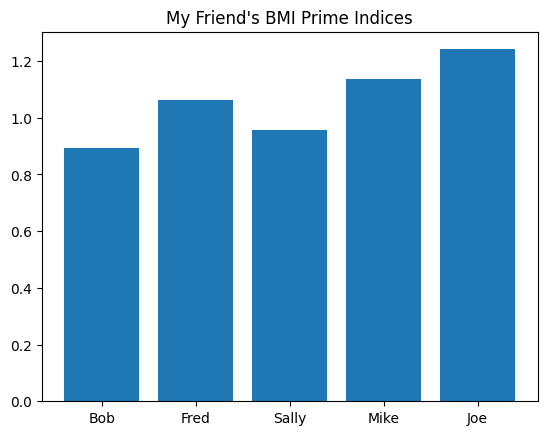

In [7]:
plt.bar(names, bmi_primes)
plt.title("My Friend's BMI Prime Indices")
plt.show()

Because only normalization was performed, the shape of the chart is identical to the previous chart. This is because applying such a transformation does not fundamentally change the data itself, but rather it expands our ability to interpret data.

Finally, the previous code interpreting the BMI was updated to incorporate BMI Prime.

In [8]:
bmi_category = None
for name, bmi, bmi_prime in zip(names, bmis, bmi_primes):
    if bmi >= 30:
        bmi_category = "obese"
    elif bmi >= 25:
        bmi_category = "overweight"
    elif bmi >= 18.5:
        bmi_category = "normal"
    else:
        bmi_category = "underweight"

    print(f"{name} has BMI of {round(bmi,2)} which is {bmi_category}. The BMI prime index is {round(bmi_prime,4)}.")  

Bob has BMI of 22.31 which is normal. The BMI prime index is 0.8922.
Fred has BMI of 26.57 which is overweight. The BMI prime index is 1.0629.
Sally has BMI of 23.88 which is normal. The BMI prime index is 0.955.
Mike has BMI of 28.41 which is overweight. The BMI prime index is 1.1362.
Joe has BMI of 31.02 which is obese. The BMI prime index is 1.241.


Based on the results of the code, Bob and Sally both are approximately 10.8% and 4.5% respectively under the upper bound healthy limit, but are still within the normal healthy weight range as stipulated by the WHO.  Fred and Mike, who were classified as overweight, are approximately 6.3% and 13.6% above being considered normal, while Joe, who is considered obese, is approimately 24.1% above normal.

### Benefits and Limitations of BMI Prime

The benefits and limitations of BMI Prime largely echo those of BMI that were discussed in an earlier section and need not be repeated here. The key difference is that BMI Prime provides a quick and easy to interpret method for comparing the relative difference between an observed BMI and the normal healthy limit. However, one limitation of this method is that it only appears to be useful for people who are overweight, as the reference measure is the upper bound limit. However, when this analysis is applied to cases involving normal weight or underweight people, that interpretation begins to become nonsensical. 

For example, Bob, who is a normal weight, recorded a BMI Prime score that was 10.8% less than the upper normal, while Fred, who is overweight, had a BMI Prime that was 6.3% higher than normal. Despite that fact that Bob is a normal weight, the relative distance between Bob's Prime score in this case is greater than Fred's Prime score. Furthermore, this method due to its bias towards higher weight makes it difficult to distinguish those who may fall into underweight catergories from those in normal categories. This may seem trivial, given that one may simply shift the reference score to the lower normal bound to address this problem. However, if this metric were to be applied broadly to compare large groups of people with diverse BMIs, any analysis and interpretation would quickly deteriorate as applying both limits simultaneously would not be possible using this method in its current form. Overall, the BMI Prime appears to be a useful metric to be used on an individual case basis, but may not be as useful for broader analyses involving the general population.

### Conclusion

In summary, BMI is a quick and cheap way of conceptualizing weight and determining whether a person is within a healthy range for their body type. It is easy to compute and visualize with minimal code in python. However, while BMI would serve as a good preliminary analysis for a health assessment, BMI should not be the sole measure that guides decision making. For instance, there have been other methods to assess weight that also factor in body composition, such as waist circumference and other limb measurements. These methods are a little more complicated to compute, and of these methods, no consensus appears to have been reached on which of these methods should be adopted generally in the same way BMI has been adopted. This means for the time being, BMI has not been rendered obsolete by conceptually superior measures, and remains a neccessary tool for providing a preliminary insight into a person's health and wellbeing. 